In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

import importlib
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools
import math_functions as mf

In [127]:
manip = ExperimentClass.Experiment("20240305_npq_lincomycin", "SpeedZen")

In [128]:
normalising_vector = []
for col in manip.Data.columns:
    normalising_vector.append(manip.Data[col][4])
manip.Data = manip.Data.div(normalising_vector, axis=1)

manip.annotations

,E,souche,added_linc_uL,actinic_light,illumination,experiment
0,11,stt7A20,0,220,0,0
1,12,stt7A20,"0,4",220,0,0
2,13,stt7A20,"0,7",220,0,0
3,14,stt7A20,"1,4",220,0,0
4,15,stt7A20,0,220,0,0
...,...,...,...,...,...,...
92,241,t222,0,1050,2,2
93,242,t222,0,1050,2,2
94,243,t222,0,1050,2,2
95,244,t222,0,1050,2,2


In [130]:
def get_kinetics(time, data):
    time_Fstat = time[3::2]/(1000*60)
    Fstat = data[3::2]
    time_Fmax = time[4::2]/(1000*60)
    Fmax = data[4::2]
    return time_Fstat, Fstat, time_Fmax, Fmax


In [131]:
time_Fstat = []
time_Fmax = []
Fstat = []
Fmax = []
for recor in manip.annotations.E:
    aux_time_Fstat, aux_Fstat, aux_time_Fmax, aux_Fmax = get_kinetics(manip.Time, manip.Data[f"E{recor}"])
    time_Fstat.append(aux_time_Fstat)
    Fstat.append(aux_Fstat)
    time_Fmax.append(aux_time_Fmax)
    Fmax.append(aux_Fmax)
 

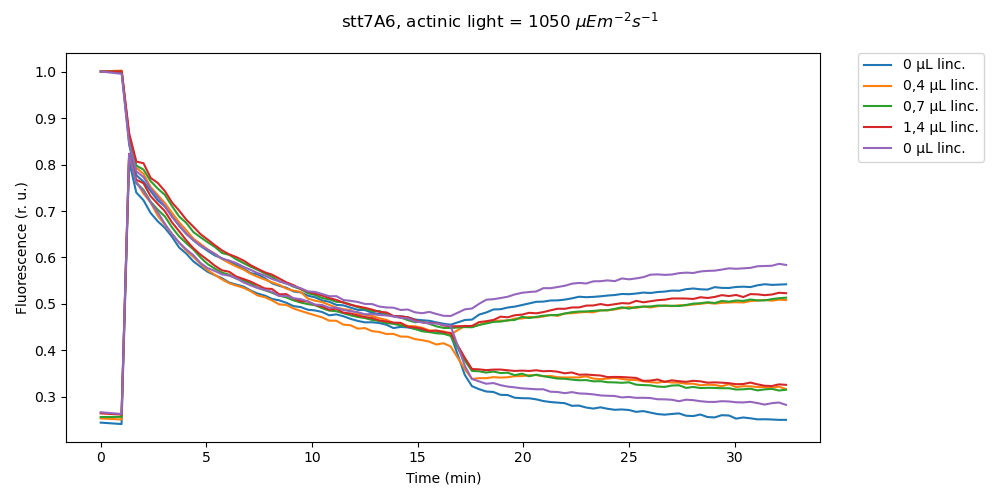

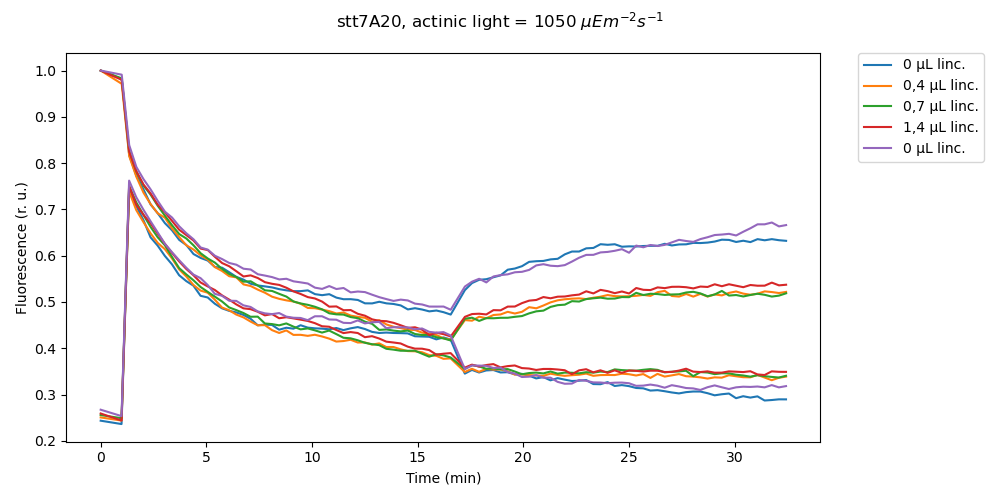

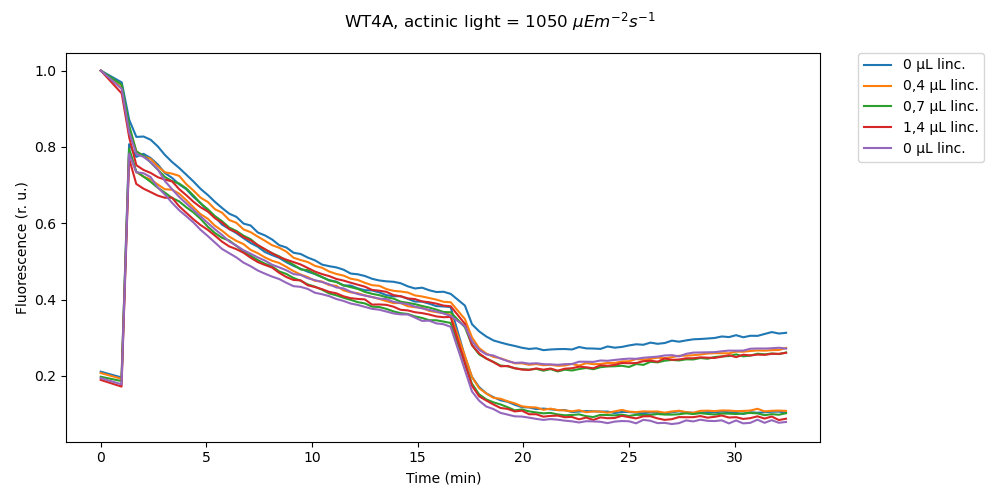

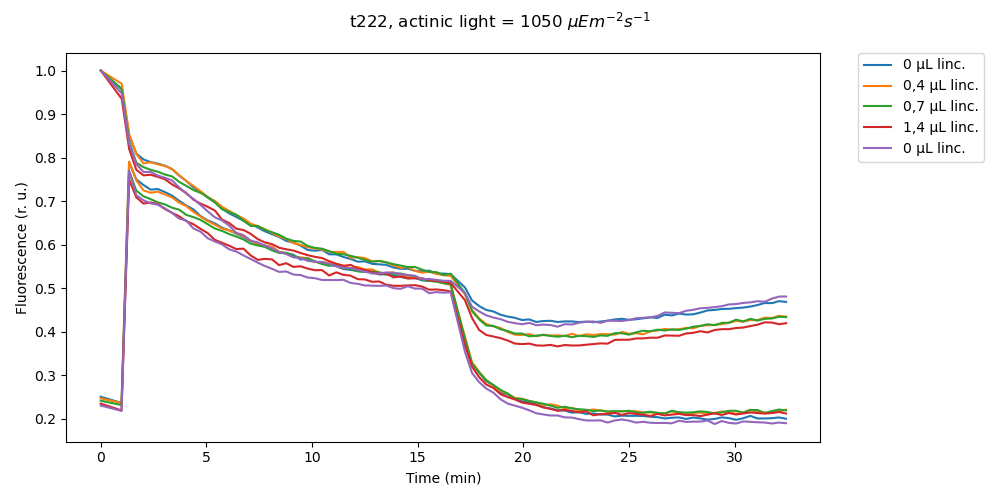

In [138]:
souches = ["stt7A6", "stt7A20", "WT4A", "t222"]
experiment = 1
illumination = 0

for i, k in enumerate(souches):
    records = list(manip.annotations[(manip.annotations.souche == souches[i]) & (manip.annotations.experiment == experiment) & (manip.annotations.illumination == illumination)].E.astype(int))
    fig, ax = plt.subplots(figsize = (10, 5))
    light = manip.annotations[(manip.annotations.souche == souches[i]) & (manip.annotations.experiment == experiment)].actinic_light.values[0]
    fig.suptitle(f"{k}, actinic light = {light}" + " $µEm^{-2}s^{-1}$")
    for j, record in enumerate(records):
        index = manip.annotations[manip.annotations.E == record].index[0]
        ax.plot(time_Fstat[index], Fstat[index], '-', markersize = 2, label = f'{manip.annotations[manip.annotations.E == record].added_linc_uL.values[0]} µL linc.', color = f'C{j}')
        ax.plot(time_Fmax[index], Fmax[index], '-', markersize = 2, color = f'C{j}')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax.set_xlabel("Time (min)")
    ax.set_ylabel("Fluorescence (r. u.)")
    fig.tight_layout()
    fig.savefig(manip.fig_folder + f"/{k}_{light}µE_{illumination}.png", dpi = 300)
    